# Exercises week 35

## Deriving and Implementing Ordinary Least Squares

This week you will be deriving the analytical expressions for linear regression, building up the model from scratch. This will include taking several derivatives of products of vectors and matrices. Such derivatives are central to the optimization of many machine learning models. Although we will often use automatic differentiation in actual calculations, to be able to have analytical expressions is extremely helpful in case we have simpler derivatives as well as when we analyze various properties (like second derivatives) of the chosen cost functions.

Vectors are always written as boldfaced lower case letters and matrices as upper case boldfaced letters. You will find useful the notes from week 35 on derivatives of vectors and matrices. See also the textbook of Faisal at al, chapter 5 and in particular sections 5.3-5.5 at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/MathMLbook.pdf>

### Learning goals

After completing these exercises, you will know how to
- Take the derivatives of simple products between vectors and matrices
- Implement OLS using the analytical expressions
- Create a feature matrix from a set of data
- Create a feature matrix for a polynomial model
- Evaluate the MSE score of various model on training and test data, and comparing their performance

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include
- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)

## How to take derivatives of Matrix-Vector expressions

In these exercises it is always useful to write out with summation indices the various quantities. Take also a look at the weekly slides from week 35 and the various examples included there.

As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 1 - Finding the derivative of Matrix-Vector expressions

**a)** Consider the expression

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}},
$$

Where $\boldsymbol{a}$ and $\boldsymbol{x}$ are column-vectors with length $n$.

What is the *shape* of the expression we are taking the derivative of?

What is the *shape* of the thing we are taking the derivative with respect to?

What is the *shape* of the result of the expression?

<u>**Answer:**</u> Since $\boldsymbol{a}$ and $\boldsymbol{x}$ are column-vectors with length $\boldsymbol{n}$, they both have the shape $(n \times 1)$, $n$ rows in $1$ column. This means that $\boldsymbol{a}^T$, the transpose of $\boldsymbol{a}$, would take on the shape $(n \times 1)^T \rightarrow (1 \times n)$, in other words become a row vector. Therefore the matrix multiplication $\boldsymbol{a}^T \boldsymbol{x}$ leads to the shape $(1 \times n) (n \times 1) \rightarrow (1 \times 1)$. Thus the expression we are taking the derivative of, $\boldsymbol{a}^T \boldsymbol{x}$, is a scalar.

We are differentiating with respect to $\boldsymbol{x}$, which has shape ($n \times 1$).

$\dfrac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}}$ is called the **Jacobian** or the **Jacobian matrix** of the expression $\boldsymbol{a}^T \boldsymbol{x}$. The differential operator $\dfrac{\partial}{\partial \boldsymbol{x}}$ leading to the matrix is explicitly defined to have its elements along the rows in the matrix, even tho $\boldsymbol{x}$ is a ($n \times 1$) coulmn vector. This could be confusing since the "normal" way of thinking about operators and matrix multiplication, is that the inner dimensions must agree: $(a \times b)(b \times c) \rightarrow (a \times c)$. So $\dfrac{\partial}{\partial \boldsymbol{x}}$ being $(1 \times n)$, would certainly not agree with $\boldsymbol{a}^T\boldsymbol{x}$ being $(1 \times 1)$.

Given the above, the **Jacobian matrix** of the expression $\boldsymbol{a}^T \boldsymbol{x}$ is a $(1 \times n)$ matrix, i.e. a row vector. We could also have said that since the elements of $\boldsymbol{a}^T$ are independent of $\boldsymbol{x}$, using the product rule: $\dfrac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T$, which we have shown have the shape $(1 \times n)$.


**b)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$

<u>**Answer**</u>: First: 

$$
\boldsymbol{a}^T \boldsymbol{x} = \left( \begin{array}{cccc} a_0, & a_1, & \cdots, & a_{n-1} \end{array} \right) \left( \begin{array}{c} x_0 \\ x_1 \\ \vdots \\ x_{n-1} \end{array} \right) = \left( \begin{array}{cccc} a_0 x_0 + a_1 x_1 + \cdots + a_{n-1} x_{n-1} \end{array} \right)
$$

The differentiation operator, in the context of producing the Jacobian matrix for $f$ - differentiating with respect to $\boldsymbol{x}$ shape $(n \times 1)$:

$$
\dfrac{\partial f}{\partial \boldsymbol{x}} = \left( \begin{array}{cccc} \cfrac{\partial f}{\partial x_0}, & \cfrac{\partial f}{\partial x_1}, & \dots, & \cfrac{\partial f}{\partial x_{n-1}} \end{array} \right)
$$

So:

\begin{align*}
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} &= \left( \begin{array}{cccc} \cfrac{\partial}{\partial x_0} \left( a_0 x_0 + a_1 x_1 + \cdots + a_{n-1} x_{n-1} \right), & \cfrac{\partial}{\partial x_1} \left( a_0 x_0 + a_1 x_1 + \cdots + a_{n-1} x_{n-1} \right), & \dots, & \cfrac{\partial}{\partial x_{n-1}} \left( a_0 x_0 + a_1 x_1 + \cdots + a_{n-1} x_{n-1} \right) \end{array} \right) \\

\\

&= \left( \begin{array}{cccc} a_0, & a_1, & \dots, & a_{n-1} \end{array} \right) \\

\\

&= \boldsymbol{a}^T
\end{align*}


Which we were to show.


**c)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$

<u>**Answer**</u>: First we take a look at the expression $\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a}$. Just writing there shape: $(1 \times n)(n \times n)(n \times 1) \rightarrow (1 \times 1)$. So again we are dealing with the derivative of a scalar with respect to a vector, this time $\boldsymbol{a}$. We can write:

$$
\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a} = (\boldsymbol{a}^T\boldsymbol{A})\boldsymbol{a}
$$


The first part: 
$$
\boldsymbol{a}^T\boldsymbol{A} = \left( \begin{array}{cccc} a_0, & a_1, & \dots, & a_{n-1} \end{array} \right)

\begin{pmatrix}
A_{0,0} & A_{0,1} & \dots & A_{0,n-1} \\
A_{1,0} & A_{1,1} & & \\
\vdots & & \ddots & \\
A_{n-1,0} & & & A_{n-1,n-1}
\end{pmatrix}
$$

$$
= \left( \begin{array}{cccc} a_0(A_{0,0} + A_{1,0} + \dots + A_{n-1,0}), & a_1(A_{0, 1} + A_{1,1} + \dots), & \dots, a_{n-1}(A_{0,n-1} + \dots + A_{n-1,n-1})\end{array} \right)
$$

Then:

$$
(\boldsymbol{a}^T\boldsymbol{A})\boldsymbol{a} = \left( \begin{array}{cccc} a_0(A_{0,0} + A_{1,0} + \dots + A_{n-1,0}), & a_1(A_{0, 1} + A_{1,1} + \dots), & \dots, a_{n-1}(A_{0,n-1} + \dots + A_{n-1,n-1})\end{array} \right) \left( \begin{array}{c} a_0 \\ a_1 \\ \vdots \\ a_{n-1} \end{array} \right)
$$

$$
\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a} =\left( \begin{array}{cccc} a_0^2(A_{0,0} + A_{1,0} + \dots + A_{n-1,0}), & a_1^2(A_{0, 1} + A_{1,1} + \dots), & \dots, a_{n-1}^2(A_{0,n-1} + \dots + A_{n-1,n-1})\end{array} \right)
$$

And finally:

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \left( \begin{array}{cccc} \dfrac{\partial}{\partial a_0} \left( a_0^2(A_{0,0} + A_{1,0} + \dots + A_{n-1,0}) \right), & \dfrac{\partial}{\partial a_1} \left( a_1^2(A_{0, 1} + A_{1,1} + \dots) \right), & \dots, \dfrac{\partial}{\partial a_{n-1}} \left( a_{n-1}^2(A_{0,n-1} + \dots + A_{n-1,n-1}) \right) \end{array} \right)
$$

$$
=\left( \begin{array}{cccc} 2(A_{0,0} + A_{1,0} + \dots + A_{n-1,0})a_0, & 2(A_{0, 1} + A_{1,1} + \dots)a_1, & \dots, 2(A_{0,n-1} + \dots + A_{n-1,n-1})a_{n-1} \end{array} \right)
$$

We recognize this expression to be identical to the one above, except for the factor $2$ in front of the columns of matrix $\boldsymbol{A}$, that means:

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T 2 \boldsymbol{A}
$$

If $\boldsymbol{A} $ is a symmetric matrices, meaning $\boldsymbol{A} = \boldsymbol{A}^T$, than: $2 \boldsymbol{A} = \boldsymbol{A} + \boldsymbol{A} = \boldsymbol{A} + \boldsymbol{A}^T$, and we have:

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T (\boldsymbol{A} + \boldsymbol{A}^T)
$$

Which was to be shown.

## Exercise 2 - Deriving the expression for OLS

The ordinary least squares method finds the parameters $\boldsymbol{\theta}$ which minimizes the squared error between our model $\boldsymbol{X\theta}$ and the true values $\boldsymbol{y}$.

To find the parameters $\boldsymbol{\theta}$ which minimizes this error, we take the derivative of the squared error expression with respect to $\boldsymbol{\theta}$, and set it equal to 0.

**a)** Very briefly explain why the approach above finds the parameters $\boldsymbol{\theta}$ which minimizes this error.

<u>**Answer**</u>: By taking the derivate of the expression for the squared error with respect to $\boldsymbol{\theta}$ we essentially get a function that tells us for which $\boldsymbol{\theta}$ the squared error function is having minimums and maximums. By setting the derivative function to zero, we can solve for $\boldsymbol{\theta}$ which will give us the coordinate for these points. We can then find the $\boldsymbol{\theta}$ that minimizes the squared error function.

We typically write the squared error as

$$
\vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2
$$

which we can rewrite in matrix-vector form as

$$
\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)
$$

**b)** If $\boldsymbol{X}$ is invertible, what is the expression for the optimal parameters $\boldsymbol{\theta}$? (**Hint:** Don't compute any derivatives, but solve $\boldsymbol{X\theta}=\boldsymbol{y}$ for $\boldsymbol{\theta}$)

<u>**Answer**</u>: Given that $\boldsymbol{X}$ is invertible, we have: 
$$
\boldsymbol{X\theta} = \boldsymbol{y}
$$

$$
\boldsymbol{X}^{-1} \boldsymbol{X} \boldsymbol{\theta} = \boldsymbol{X}^{-1} \boldsymbol{y}
$$

$$
\boldsymbol{\theta} = \boldsymbol{X}^{-1} \boldsymbol{y}
$$

It is also common practice, especially if $\boldsymbol{X}$ is not square to multiply with the transpose $\boldsymbol{X}^T$ on both sides of the equation. The product $(\boldsymbol{X}^T \boldsymbol{X})$ is always square keeping the inverse - or in case we can't find a true inverse, the pseudo inverse - also square.

$$
\boldsymbol{X}^T \boldsymbol{X} \theta = \boldsymbol{X}^T \boldsymbol{y}
$$

$$
(\boldsymbol{X}^T \boldsymbol{X})^{-1} (\boldsymbol{X}^T \boldsymbol{X}) \theta = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}
$$

$$
\theta = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}
$$

**c)** Show that

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

<u>**Answer**</u>: We can rewrite $\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)$ as:

$$
\left( \boldsymbol{x}^T - \boldsymbol{s}^T \boldsymbol{A}^T \right) \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right) = \boldsymbol{x}^T\boldsymbol{x} -\boldsymbol{s}^T \boldsymbol{A}^T \boldsymbol{x} - \boldsymbol{x}^T \boldsymbol{As} + \boldsymbol{s}^T \boldsymbol{A}^T \boldsymbol{As}
$$

From the original expression we know that for $(\boldsymbol{x} - \boldsymbol{As})$ to make sense, $\boldsymbol{A}$ and $\boldsymbol{s}$ must share inner dimensions. So say $\boldsymbol{A}$ is an $(m \times n)$ matrix, then $\boldsymbol{s}$ must be $(n \times 1)$. Their transposes are then $(n \times m)$ and $(1 \times n)$ respectively. Then $\boldsymbol{x}$ have to be the same shape as $\boldsymbol{As}$ which is $(m \times n)(n \times 1)\rightarrow(m \times 1)$. We see now from the first term that the sum must be a scalar. The shape of the two middle terms in the expression with three factors is: 

$$

\text{and}
$$

**d)** Using the expression from **c)**, but substituting back in $\boldsymbol{\theta}$, $\boldsymbol{y}$ and $\boldsymbol{X}$, find the expression for the optimal parameters $\boldsymbol{\theta}$ in the case that $\boldsymbol{X}$ is not invertible, but $\boldsymbol{X^T X}$ is, which is most often the case.

$$
\boldsymbol{\hat{\theta}_{OLS}} = ...
$$

<u>**Answer**</u>: After the substitution:
$$
\boldsymbol{\hat{\theta}_{OLS}} = -2\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\boldsymbol{X},
$$

## Exercise 3 - Creating feature matrix and implementing OLS using the analytical expression

With the expression for $\boldsymbol{\hat{\theta}_{OLS}}$, you now have what you need to implement OLS regression with your input data and target data $\boldsymbol{y}$. But before you can do that, you need to set up you input data as a feature matrix $\boldsymbol{X}$.

In a feature matrix, each row is a datapoint and each column is a feature of that data. If you want to predict someones spending based on their income and number of children, for instance, you would create a row for each person in your dataset, with the montly income and the number of children as columns.

We typically also include an intercept in our models. The intercept is a value that is added to our prediction regardless of the value of the other features. The intercept tries to account for constant effects in our data that are not dependant on anything else. In our current example, the intercept could account for living expenses which are typical regardless of income or childcare expenses.

We calculate the optimal intercept by including a feature with the constant value of 1 in our model, which is then multplied by some parameter $\theta_0$ from the OLS method into the optimal intercept value (which will be $\theta_0$). In practice, we include the intercept in our model by adding a column of ones to the start of our feature matrix.

In [40]:
import numpy as np

In [41]:
n = 20
income = np.array([116., 161., 167., 118., 172., 163., 179., 173., 162., 116., 101., 176., 178., 172., 143., 135., 160., 101., 149., 125.])
children = np.array([5, 3, 0, 4, 5, 3, 0, 4, 4, 3, 3, 5, 1, 0, 2, 3, 2, 1, 5, 4])
spending = np.array([152., 141., 102., 136., 161., 129.,  99., 159., 160., 107.,  98., 164., 121.,  93., 112., 127., 117.,  69., 156., 131.])


**a)** Create a feature matrix $\boldsymbol{X}$ for the features income and children, including an intercept column of ones at the start.

In [42]:
X = np.zeros((n, 3))
X[:, 0] = np.ones(n)    # Intercept column
X[:, 1] = income
X[:, 2] = children

y = spending

This create a feature matrix with $\boldsymbol{X}$ with first column having ones, second the income, and third the number of children.  

**b)** Use the expression from **2d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting spending based on these features. Create a function for this operation, as you are going to need to use it a lot.

In [43]:
def OLS_parameters(X, y):
    """
    Take an invertible feature matrix X, and a column vector y

    Return the parameters of OLS fit.
    """
    X_inv = np.linalg.pinv(X) # The inverse of matrix X, using .pinv in case X is not square
    beta = X_inv @ y    # The beta vector in: X @ beta = y, solved for beta
    return beta

beta = OLS_parameters(X, y)
print("The beta vector:", beta)

The beta vector: [ 9.12808583  0.5119025  14.60743095]


## Exercise 4 - Fitting a polynomial

In this course, we typically do linear regression using polynomials, though in real world applications it is also very common to make linear models based on measured features like you did in the previous exercise.

When fitting a polynomial with linear regression, we make each polynomial degree($x, x^2, x^3, ..., x^p$) its own feature.

In [234]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Create a feature matrix $\boldsymbol{X}$ for the features $x, x^2, x^3, x^4, x^5$, including an intercept column of ones at the start. Make this into a function, as you will do this a lot over the next weeks.

In [235]:
def polynomial_features(x, p):
    """
    Take an array of x values, and the desired polynomial degree p.

    Create a feature (design) matrix with ones in the first column, and the subsequently columns containing 
    x with the elements raised to the power of the corresponding column number, degree x^1 to x^p.
    """
    n = len(x)
    X = np.zeros((int(n), int(p + 1)))
    X[:, 0] = np.ones(n)        # Create first column with only ones, the intercept
    for i in range(1, int(p+1)):
        X[:, i] = x**i
    
    return X

X = polynomial_features(x, 5)
print(X)

[[ 1.00000000e+00 -3.00000000e+00  9.00000000e+00 -2.70000000e+01
   8.10000000e+01 -2.43000000e+02]
 [ 1.00000000e+00 -2.93939394e+00  8.64003673e+00 -2.53964716e+01
   7.46502347e+01 -2.19426447e+02]
 [ 1.00000000e+00 -2.87878788e+00  8.28741965e+00 -2.38577232e+01
   6.86813245e+01 -1.97718964e+02]
 [ 1.00000000e+00 -2.81818182e+00  7.94214876e+00 -2.23824192e+01
   6.30777269e+01 -1.77764503e+02]
 [ 1.00000000e+00 -2.75757576e+00  7.60422406e+00 -2.09692239e+01
   5.78242235e+01 -1.59454677e+02]
 [ 1.00000000e+00 -2.69696970e+00  7.27364555e+00 -1.96168016e+01
   5.29059195e+01 -1.42685662e+02]
 [ 1.00000000e+00 -2.63636364e+00  6.95041322e+00 -1.83238167e+01
   4.83082440e+01 -1.27358098e+02]
 [ 1.00000000e+00 -2.57575758e+00  6.63452709e+00 -1.70889334e+01
   4.40169497e+01 -1.13376992e+02]
 [ 1.00000000e+00 -2.51515152e+00  6.32598714e+00 -1.59108162e+01
   4.00181133e+01 -1.00651618e+02]
 [ 1.00000000e+00 -2.45454545e+00  6.02479339e+00 -1.47881292e+01
   3.62981354e+01 -8.9095

**b)** Use the expression from **2d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting $\boldsymbol{y}$ based on these features. If you have done everything right so far, this code will not need changing.

In [236]:
beta = OLS_parameters(X, y)
print(beta)

[ 0.6942779   0.27464654 -0.02326439  0.05342623 -0.0034652  -0.0087781 ]


**c)** Like in exercise 4 last week, split your feature matrix and target data into a training split and test split.

In [237]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x1_train = X_train[:,1] # Unaltered x**1-values in the training set
x1_test = X_test[:,1]   # Unaltered x**1-values in the test set

print("Shape of X and y train:", np.shape(X_train), np.shape(y_train))
print("Shape of X and y test:", np.shape(X_test), np.shape(y_test))


Shape of X and y train: (80, 6) (80,)
Shape of X and y test: (20, 6) (20,)


**d)** Train your model on the training data(find the parameters which best fit) and compute the MSE on both the training and test data.

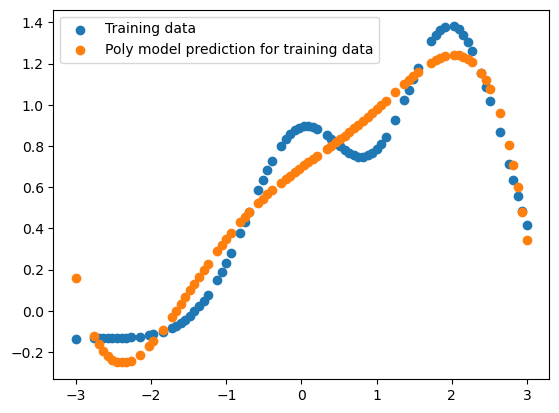

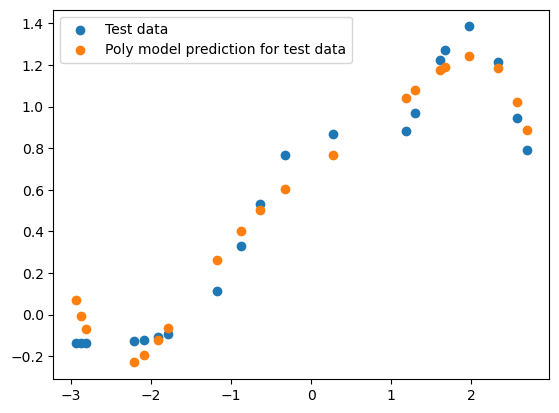

MSE for the predicted function against the train data: 0.014580527687802472
MSE for the predicted function against test data: 0.011491447938251449


In [238]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

beta_train = OLS_parameters(X_train, y_train)

def model_func(x, beta):
    """
    Creating a model-function by using the beta values as parameters in a polynomial of degree len(beta).
    Automatically finding the degree of the polynomial from len(beta).
    f = beta_0 + beta_1*x + beta_2*x**2 + ... + beta_n*x**n
    """
    n = len(beta)
    beta = beta.reshape((n, 1)) # Explicitly shaping beta array to a column vector, (1 x len(beta))
    X = np.zeros((len(x), n))
    for i in range(n):          # First column is filled with ones, cause x**0 = 1
        X[:,i] = x**i
    y = X @ beta
    return y

predict_train_y = model_func(x1_train, beta_train)  # The model predicting the data it was trained on
predict_test_y = model_func(x1_test, beta_train)    # The model predicting unseen test data 

plt.scatter(x1_train, y_train, label = "Training data")
plt.scatter(x1_train, predict_train_y, label = "Poly model prediction for training data")
plt.legend()
plt.show()
plt.close()

plt.scatter(x1_test, y_test, label = "Test data")
plt.scatter(x1_test, predict_test_y, label = "Poly model prediction for test data")
plt.legend()
plt.show()
plt.close()

poly_predict_train_mse = mean_squared_error(y_train, predict_train_y)
print("MSE for the predicted function against the train data:", poly_predict_train_mse)
poly_predict_test_mse = mean_squared_error(y_test, predict_test_y)
print("MSE for the predicted function against test data:", poly_predict_test_mse)

We see that the MSE for the prediction on the test data is of the same order of magnitude as for the prediction made on the training data.

**e)** Do the same for each polynomial degree from 2 to 10, and plot the MSE on both the training and test data as a function of polynomial degree. The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf). Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

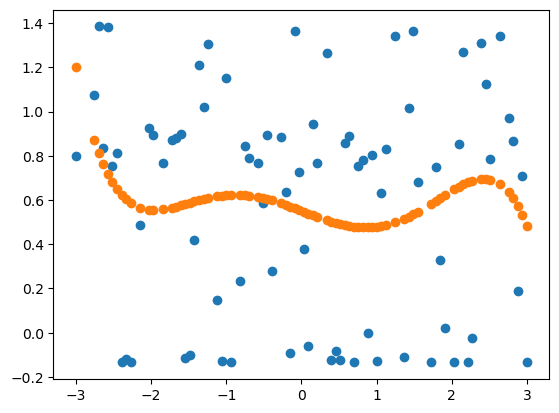

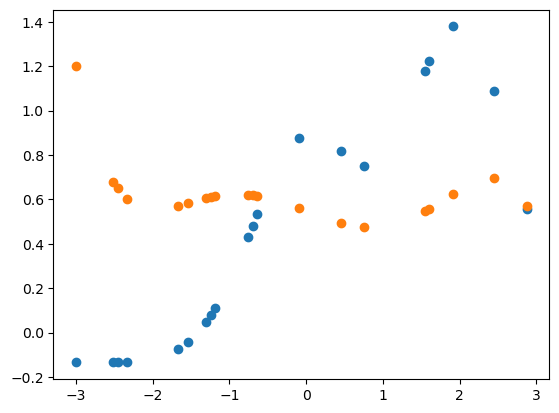

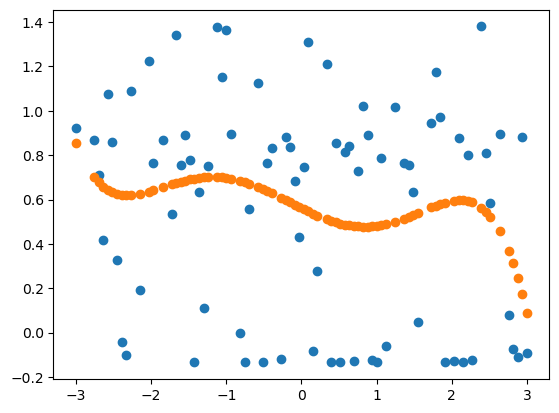

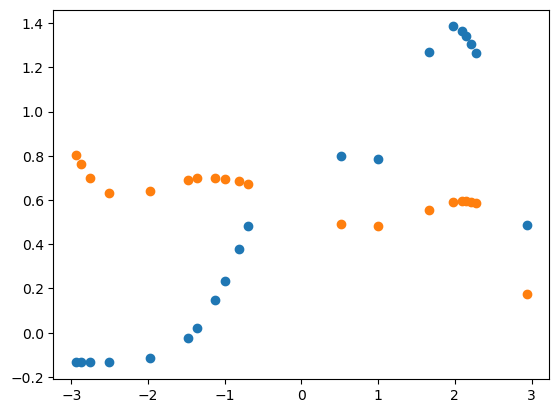

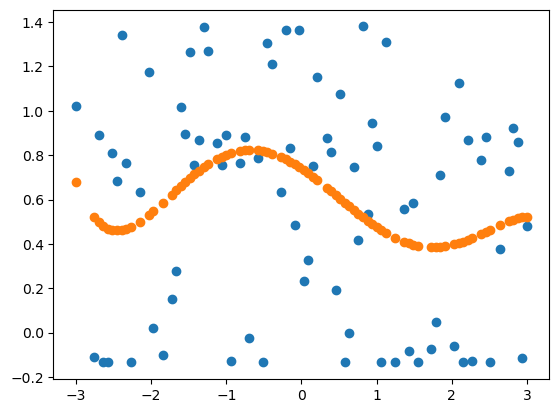

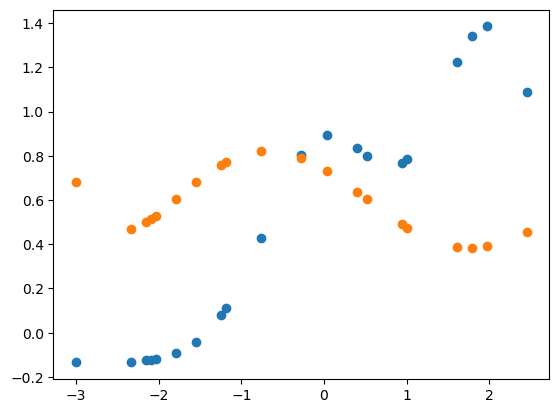

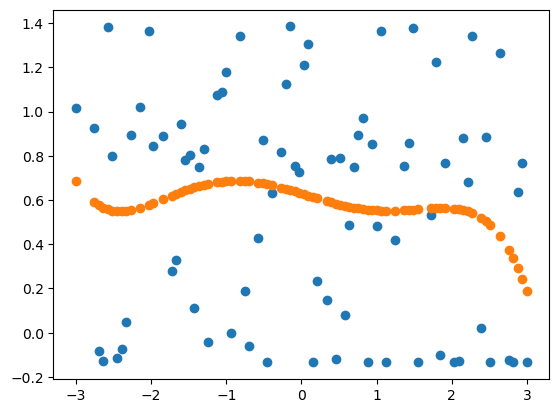

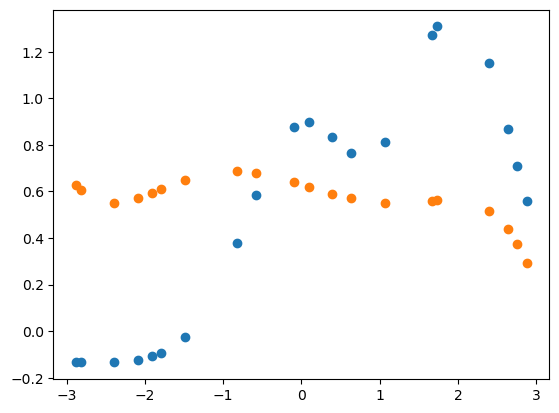

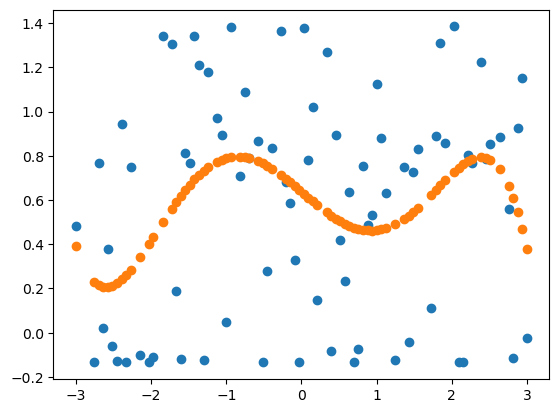

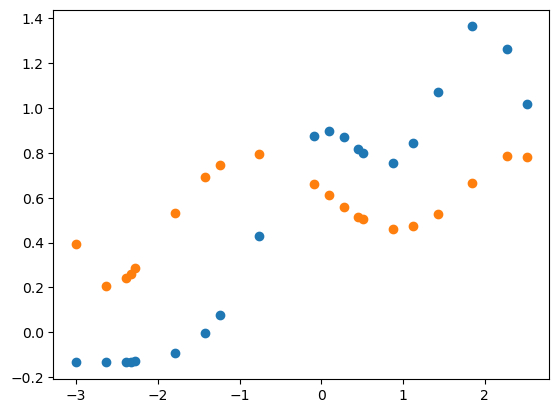

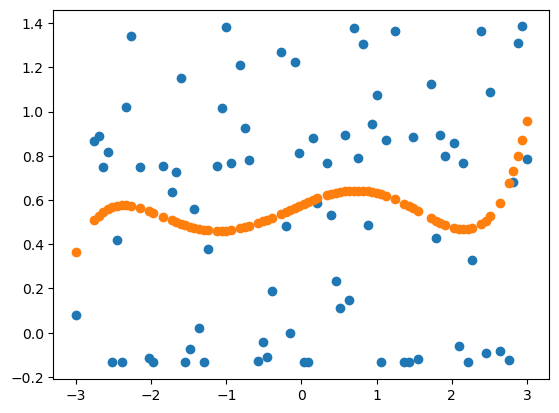

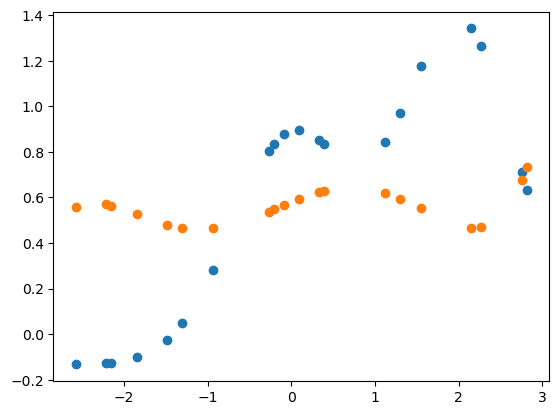

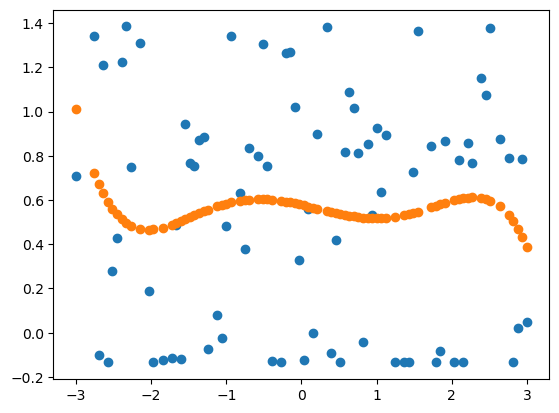

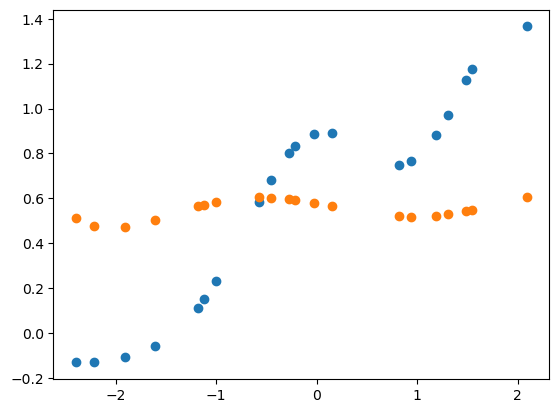

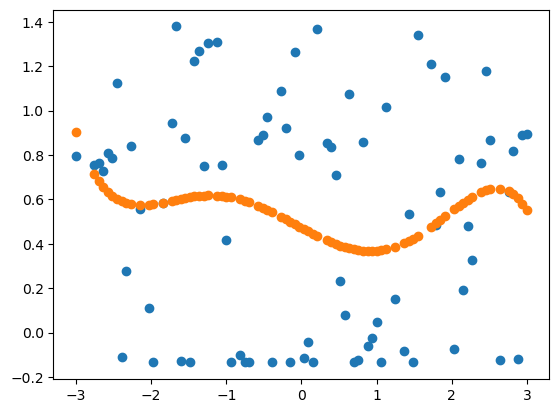

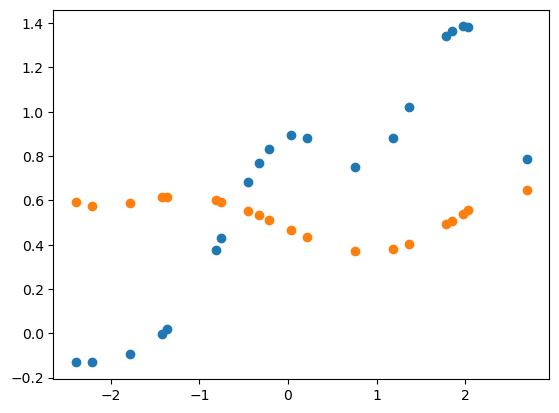

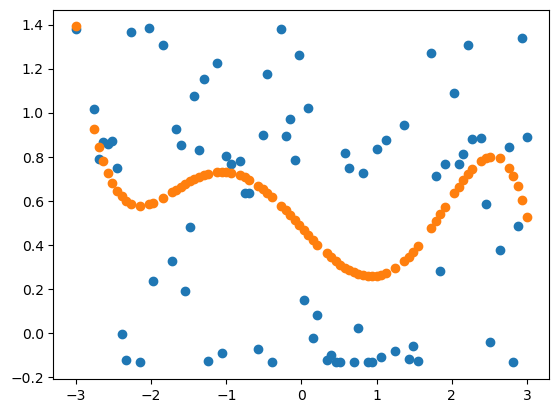

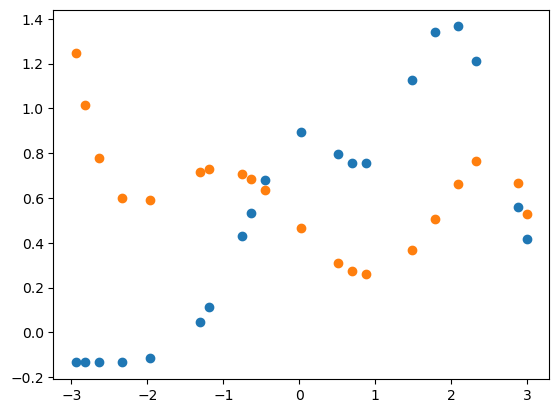

In [ ]:
poly_min = 2
poly_max = 10
poly_degrees = np.arange(poly_min, poly_max + 1)

X_features_polys = {}
X_features_polys_split = {}
beta_polys = {}
predict_poly = {}


for i in poly_degrees:
    X_features_polys[f"X{i}"] = polynomial_features(x, i) # Storing the feature matrices as X2, X3, etc.

    X__train, X_test, y_train, y_test = train_test_split(X_features_polys[f"X{i}"], y, test_size=0.2)
    X_features_polys_split[f"X{i}_train"] =  X_train
    X_features_polys_split[f"X{i}_test"] = X_test
    X_features_polys_split[f"y{i}_train"] = y_train
    X_features_polys_split[f"y{i}_test"] = y_test

    beta_polys[f"beta{i}"] = OLS_parameters(X_features_polys_split[f"X{i}_train"], X_features_polys_split[f"y{i}_train"])

    predict_poly[f"pred_train{i}"] = model_func(X_features_polys_split[f"X{i}_train"][:,1], beta_polys[f"beta{i}"])
    predict_poly[f"pred_test{i}"] = model_func(X_features_polys_split[f"X{i}_test"][:,1], beta_polys[f"beta{i}"])

    plt.scatter(X_features_polys_split[f"X{i}_train"][:,1], X_features_polys_split[f"y{i}_train"], label = "Training data")
    plt.scatter(X_features_polys_split[f"X{i}_train"][:,1], predict_poly[f"pred_train{i}"], label = "Poly model prediction for training data")
    plt.show()

    plt.scatter(X_features_polys_split[f"X{i}_test"][:,1], X_features_polys_split[f"y{i}_test"], label = "Test data")
    plt.scatter(X_features_polys_split[f"X{i}_test"][:,1], predict_poly[f"pred_test{i}"], label = "Poly model prediction for test data")
    plt.show()

#print(X_features_polys["X3"])  # Access the matrix for degree 3
#print(np.shape(X_features_polys_split["X3_train"]))
#print(beta_polys["beta3"])
#print(predict_poly["pred_test3"])



# plt.scatter(X_features_polys_split["X10_train"][:,1], X_features_polys_split["y10_train"], label = "Training data")
# plt.scatter(X_features_polys_split["X10_train"][:,1], predict_poly["pred_train10"], label = "Poly model prediction for training data")
# plt.legend()
# plt.show()
# plt.close()

# plt.scatter(X_features_polys_split["X10_test"][:,1], X_features_polys_split["y10_test"], label = "Test data")
# plt.scatter(X_features_polys_split["X10_test"][:,1], predict_poly["pred_test10"], label = "Poly model prediction for test data")
# plt.legend()
# plt.show()
# plt.close()


**f)** Interpret the graph. Why do the lines move as they do? What does it tell us about model performance and generalizability?

## Exercise 5 - Comparing your code with sklearn

When implementing different algorithms for the first time, it can be helpful to double check your results with established implementations before you go on to add more complexity.

**a)** Make sure your `polynomial_features` function creates the same feature matrix as sklearns PolynomialFeatures.

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

**b)** Make sure your `OLS_parameters` function computes the same parameters as sklearns LinearRegression with fit_intercept set to False, since the intercept is included in the feature matrix. Use `your_model_object.coef_` to extract the computed parameters.

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)